In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('/Users/meetsudra/Documents/GitHub/deeplearning/datasets/placement.csv')

In [6]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

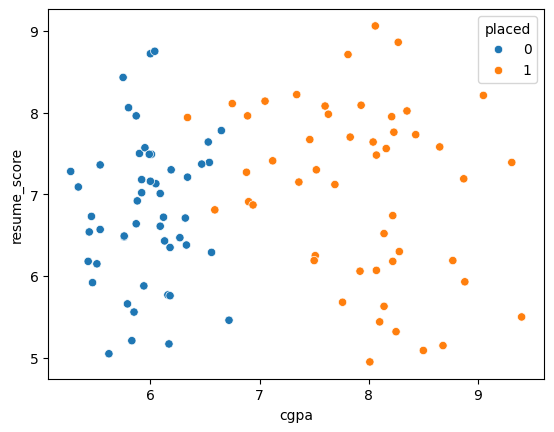

In [9]:
sns.scatterplot(x='cgpa',y='resume_score',hue='placed',data=df)

we can see how linear the data is 

In [11]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [12]:
from sklearn.linear_model import Perceptron
# using perceptron class from scikit learn

p = Perceptron()
p.fit(X,y)

Perceptron()

In [14]:
p.coef_ #using coef_ attribute to see weight values

array([[ 40.26, -36.  ]])

In [15]:
p.intercept_

array([-25.])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

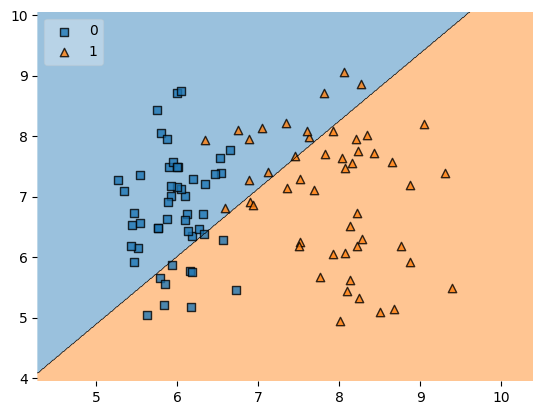

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=p, legend=2)

# The goal was to practically implement a perceptron

# Moving to optimizing the parameters

Now How do we classify the points correctly?
simply by changing the values of weights.
To just start with it, first of all values of weights are randomly choosen. It returns a line misclassifying the datapoints. 

We then alter these values to classify them correctly. The equation is as such Ax1+Bx2+C=0. Wherein values of A B and C are modified to achieve expected linear classification. Lets say we have a equation, 2x+4y+5=0 you can visualize this line on (desmos). On changing th value of C that is 5, line shifts parallely depending upon the value increased or decreased. On changing the value of A i.e. 2, it shifts from it original postion keeping the position 
corresponding to B values same and vice versa while changing the value of B.
This is how transformation of lines occur.

Visualization of the effect of changing the values of parameter i.e A B C or W1 W2 b on the line classifying the datapoints 

transforming a line to classify a data point which is on the positive side and getting it on the negative side of it.
line = 2x+3y+5 = 0 data point= (5,2) on the positive side 
transformed line = -3x+1y+4=0 
U do this by substracting (2,3,5)-(5,2,1)=(-3,1,4) to get a point from positive to negative side u substract 

transforming a line to classify a data point which is on the negative side and getting it on the positive side of it.
line = 2x+3y+5 = 0 data point= (-3,-6) on the positive side 
transformed line = -1x-3y+6=0 
U do this by substracting (2,3,5)+(-3,-6,1)=(-1,-3,6) to get a point from negative to positive side u add

In real the transformations are not these big, we use learning rate (eta) 
lets say we take eta=0.01, then our new coefficients would be as such new_coef = (2,3,5)-eta(5,2,1) = (2,3,5)-(0.05,0.02,0.01)

This way transformation happens in perceptron trick

new_weights_of_line = old_weights_of_line +/- eta(coef_of_datapoint)

Ax1 + Bx2 + c = 0 can be written as 
wo + w1x1 + w2x2 = 0 where C = wo, A = w1, B = w2

this give the formula (consider xo=1, the whole new column with values 1)


(i=1 to 2)
∑ wixi = 0
  



In [20]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False, class_sep=10)

In [28]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [29]:
X.shape

(100, 2)

In [23]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

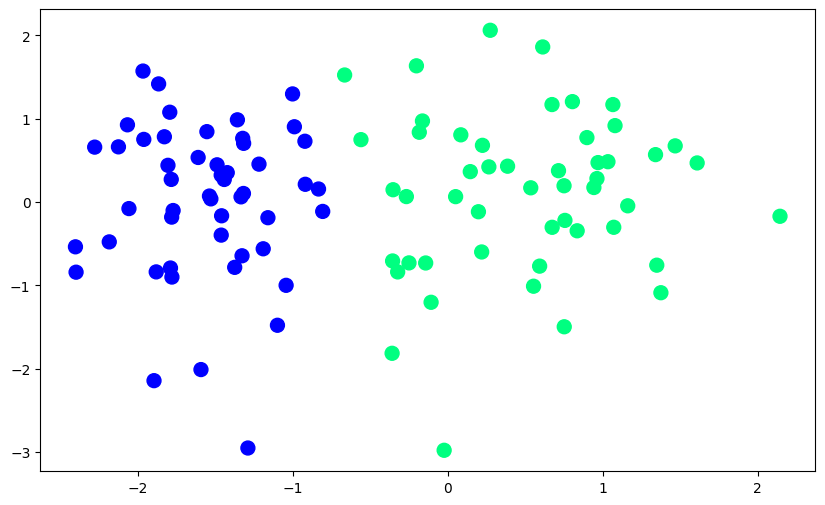

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

lets see how formula works for any datapoint 

In [37]:
i = np.insert(X[23],0,1)
i

array([1.        , 1.61043259, 0.46886454])

In [39]:

y_hat = np.dot(i,[1,1,1]) # randomly selected the weights
y_hat

# if the value is greater then equal to 0 then positive if less then 0 then negative 

3.079297138387856

In [42]:
def step(z):
    return 1 if z>0 else 0


In [43]:
step(y_hat)

1

In [50]:
def perceptron(X, y):
    X = np.insert(X,0,1,axis=1) # inserting bias term
    weights = np.ones(X.shape[1]) # weights as per the columns of X
    lr = 0.1 # learning rate

    for i in range(1000):#epochs
        j = np.random.randint(0,100) # randomly selecting a datapoint
        y_hat = step(np.dot(X[j],weights)) # prediction for that selected point 
        weights = weights + lr*(y[j]-y_hat)*X[j] # new_weights_of_line = old_weights_of_line + 
    return weights[0],weights[1:]
    # intercept term, coefficients

# now here in weight update operation
# weights get update if 
# actual predicted actual - predicted(yi-y_hati)
#    1      1             0                         wont
#    0      0             0                         wont
#    1      0             1                         will update       old_weights_of_line + datapoint  
#    0      1            -1                         will update       old_weights_of_line - datapoint


In [51]:
intercept_,coef_ = perceptron(X,y)

In [53]:
print(intercept_)
print(coef_) # w1 and w2

0.9
[1.37961591 0.15181582]


In [62]:
# Ax + By + C = 0 if u have values of A, B, C
# (y = mx + c) u can get value of 
# m = -(A/B) and c = -(C/B) 
# therefore

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
print(m)
print(b)


-9.087431648945856
-5.92823584575677


In [63]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

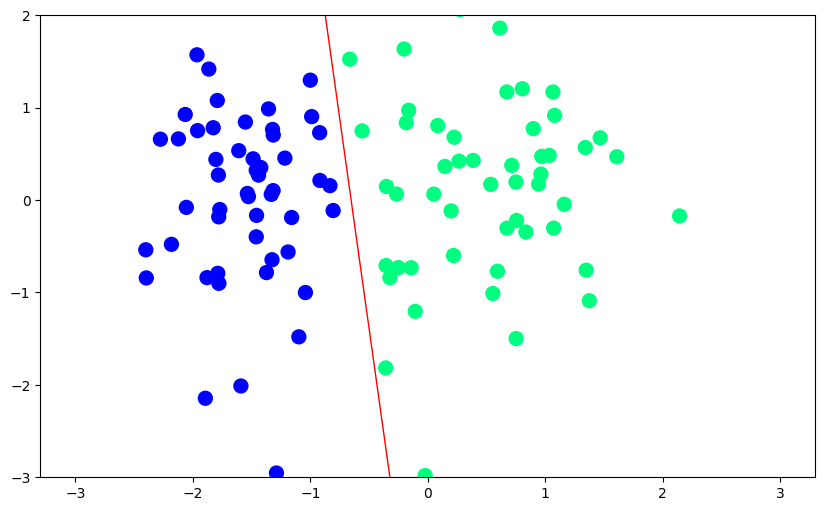

In [64]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=1)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)